# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
18623   35           Private  127306     Assoc-voc             11   
4766    63                 ?  203821       HS-grad              9   
17363   26           Private  169727       HS-grad              9   
10461   36           Private  206951     Bachelors             13   
15104   45      Self-emp-inc  120131       HS-grad              9   
24276   21           Private  161415  Some-college             10   
8088    54                 ?  148657     Preschool              1   
11426   47         Local-gov  173938     Bachelors             13   
12705   40  Self-emp-not-inc  188436       HS-grad              9   
31642   57           Private  316000       HS-grad              9   

           marital-status       occupation    relationship   race     sex  \
18623       Never-married     Adm-clerical       Own-child  White  Female   
4766   Married-civ-spouse                ?         Husband  White    Male   
17363  Married-civ-spouse     Tech-support         Husband  White    Male   
10461  Married-civ-spouse            Sales         Husband  White    Male   
15104  Married-civ-spouse     Craft-repair         Husband  White    Male   
24276       Never-married     Craft-repair   Not-in-family  White    Male   
8088   Married-civ-spouse                ?            Wife  White  Female   
11426  Married-civ-spouse     Craft-repair         Husband  White    Male   
12705           Separated  Exec-managerial  Other-relative  White    Male   
31642  Married-civ-spouse     Craft-repair         Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
18623         14344             0              40  United-States   >50K  
4766              0             0              40  United-States  <=50K  
17363             0             0              40  United-States  <=50K  
10461             0          1902              45  United-States   >50K  
15104             0             0              50  United-States   >50K  
24276             0             0              50  United-States  <=50K  
8088              0             0              40         Mexico  <=50K  
11426             0             0              50  United-States   >50K  
12705             0             0              40  United-States  <=50K  
31642             0             0              40  United-States  <=50K

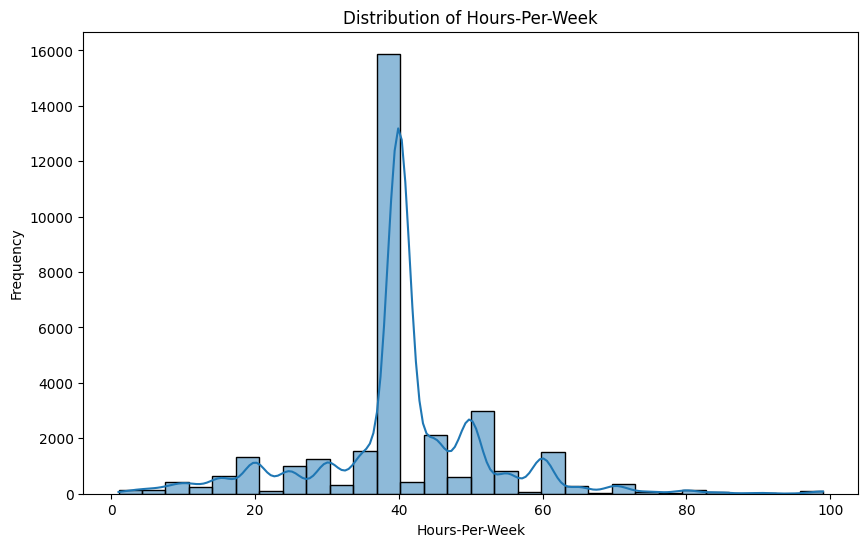

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data["hours-per-week"], kde=True, bins=30)
plt.title("Distribution of Hours-Per-Week")
plt.xlabel("Hours-Per-Week")
plt.ylabel("Frequency")
plt.show()

print(data["hours-per-week"].describe())

In [4]:
print(data.describe(include="all"))

                 age workclass        fnlwgt education  education-num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                32561           32561        

In [5]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_report = pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage})
print(missing_report)

                Missing Values  Percentage (%)
age                          0             0.0
workclass                    0             0.0
fnlwgt                       0             0.0
education                    0             0.0
education-num                0             0.0
marital-status               0             0.0
occupation                   0             0.0
relationship                 0             0.0
race                         0             0.0
sex                          0             0.0
capital-gain                 0             0.0
capital-loss                 0             0.0
hours-per-week               0             0.0
native-country               0             0.0
income                       0             0.0


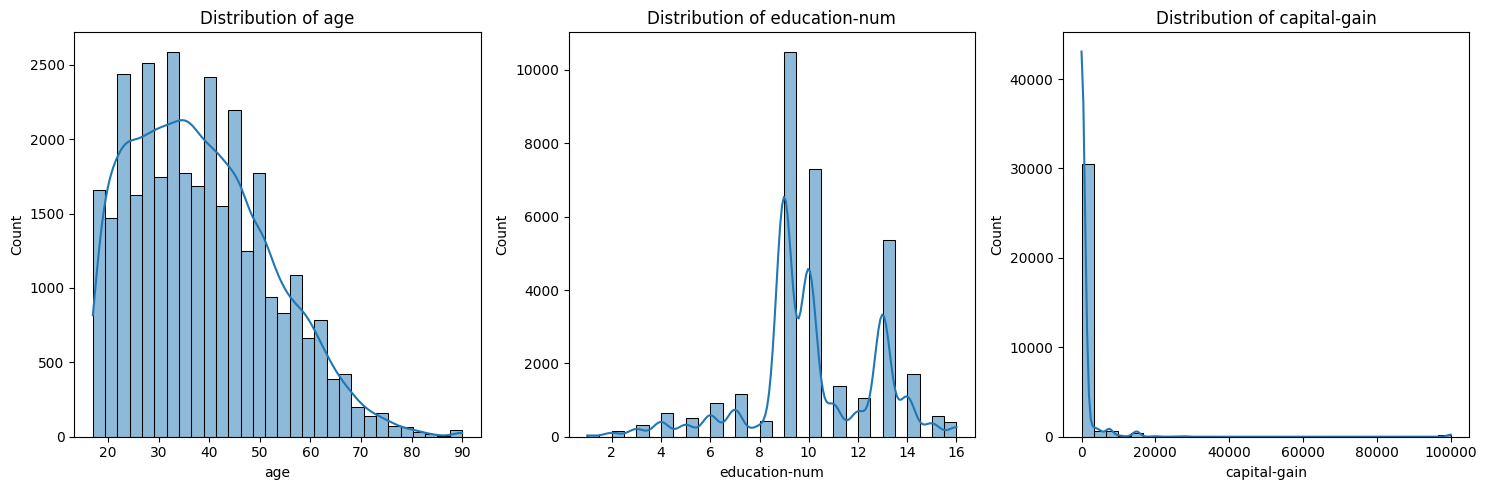

In [6]:
numerical_columns = ["age", "education-num", "capital-gain"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

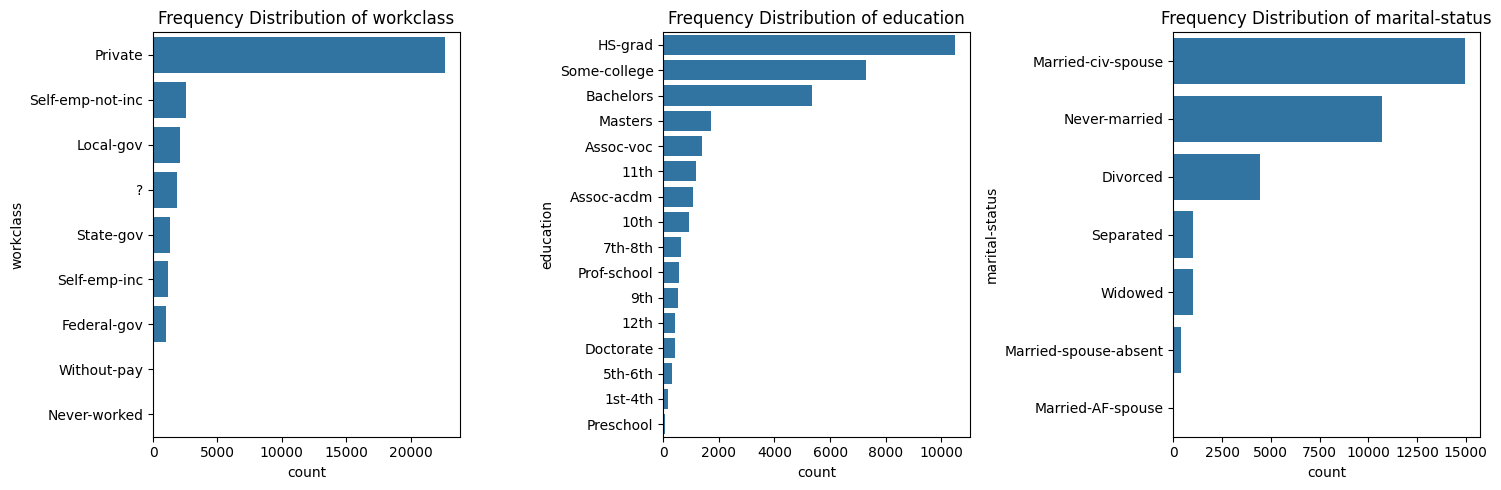

In [7]:
categorical_columns = ["workclass", "education", "marital-status"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Frequency Distribution of {col}")
plt.tight_layout()
plt.show()

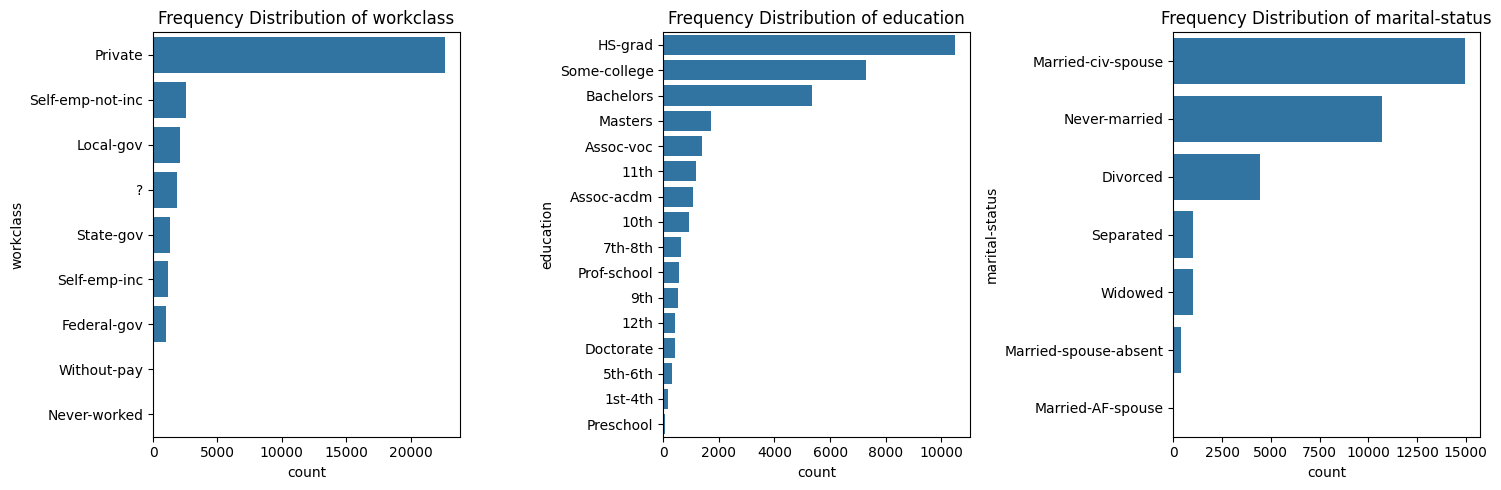

In [8]:
categorical_columns = ["workclass", "education", "marital-status"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Frequency Distribution of {col}")
plt.tight_layout()
plt.show()

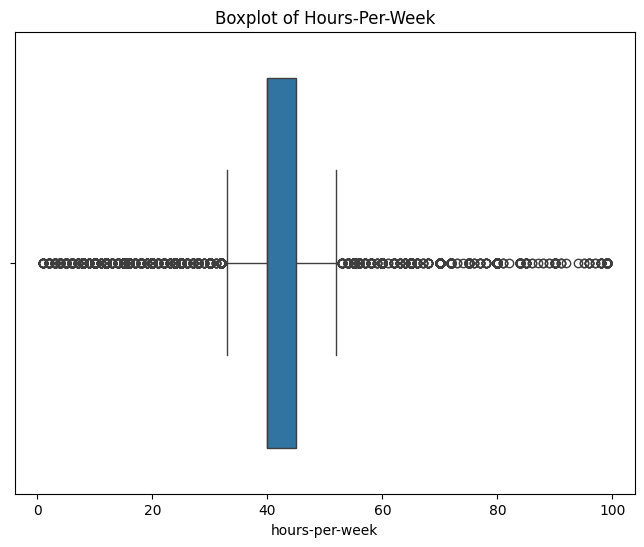

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot of Hours-Per-Week")
plt.show()

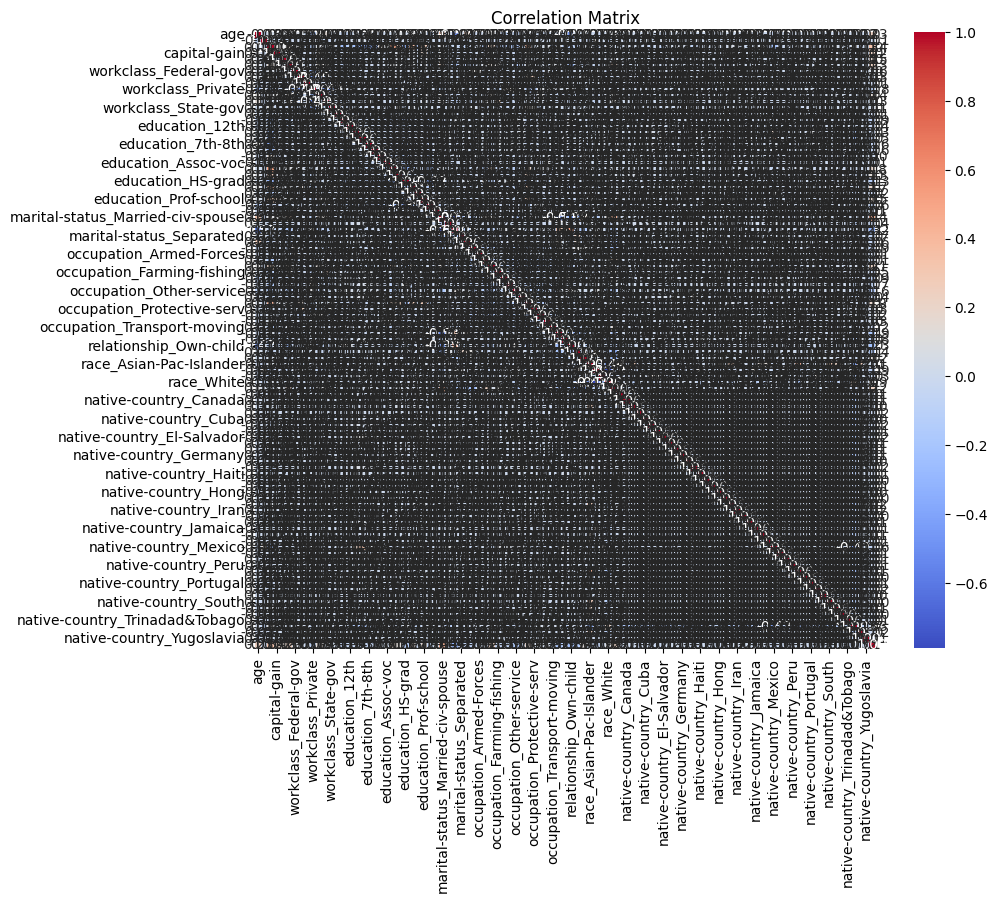

hours-per-week                       1.000000
income_>50K                          0.229689
sex_Male                             0.229309
marital-status_Married-civ-spouse    0.212817
education-num                        0.148123
                                       ...   
education_11th                      -0.102038
marital-status_Widowed              -0.107122
occupation_Other-service            -0.155872
marital-status_Never-married        -0.197936
relationship_Own-child              -0.249254
Name: hours-per-week, Length: 101, dtype: float64


In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix["hours-per-week"].sort_values(ascending=False))

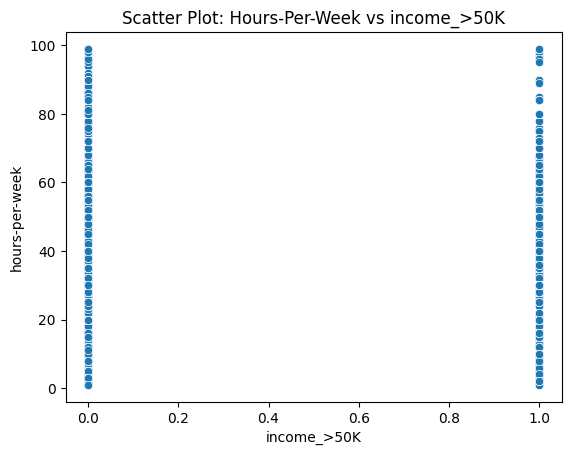

In [15]:
most_correlated = correlation_matrix["hours-per-week"].drop("hours-per-week").idxmax()
sns.scatterplot(x=data_encoded[most_correlated], y=data["hours-per-week"])
plt.title(f"Scatter Plot: Hours-Per-Week vs {most_correlated}")
plt.show()

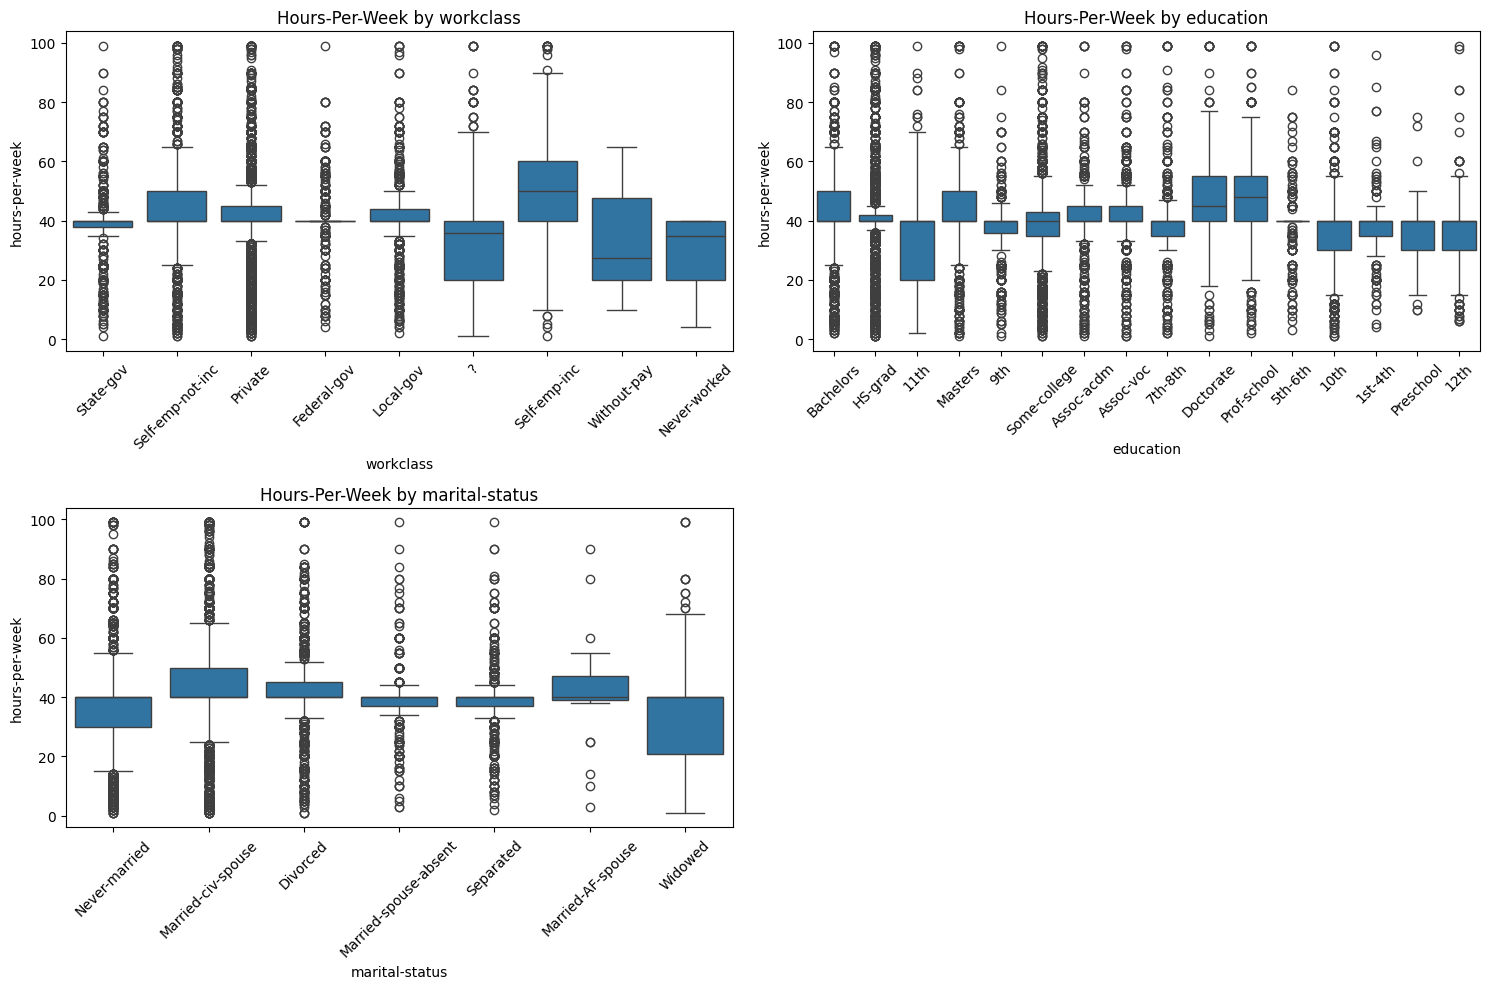

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], y=data["hours-per-week"])
    plt.title(f"Hours-Per-Week by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()